### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib as plt
import statsmodels.api as sm
%matplotlib inline

### Importing CSV Data

In [2]:
brews = pd.read_csv("full_brews.csv")
dogfood = pd.read_csv("Organic Pet Food.csv")
wine = pd.read_csv("Wine Barrels_ts.csv")
coffee = pd.read_csv("Specialty Coffee.csv")
brewery_numbers = pd.read_csv("number_breweries.csv")
cpi_beer = pd.read_csv("cpi_alcohol.csv")
number_drinks = pd.read_csv("number_drinks.csv")
state_income = pd.read_csv("state_income_rows.csv")
regions = pd.read_csv("regions.csv")

In [3]:
brews = pd.merge(brews, regions)

### Creating Master Data Frame (combining factors)

In [4]:
beercoffee = pd.merge(brews, coffee)
dogcoffee = pd.merge(beercoffee, dogfood)
dogcoffeewine = pd.merge(dogcoffee, wine)
dogcoffeewineincome = pd.merge(dogcoffeewine, state_income)

In [5]:
brewmaster = dogcoffeewineincome

### Setting Times Series - Master DF

In [6]:
#data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)
#df['column'].resample('A').mean().plot()

brewmaster['Date'] = pd.to_datetime(brewmaster['Date'])
brewmaster.set_index('Date', inplace = True)

## Time Series Visualization

### Mean production

We can see in the graph below that while there is a notable range in overall production, the mean production for all 'craft breweries' still saw a marked increase from 2008 to 2014.  It is my opinion that this helps to demonstrate why it would be inaccurate to simply dismiss this increase as being the result of better performance on the part of the largest breweries.  It is my theory, rather, that the larger breweries were simply in a better position to capitalize on the growing craft market - they have far more means of production and distribution than new breweries do.  

A new brewery may only be able to sell to customers who come on site, whereas a large brewery can distribute in a grocery store chain.  

However, while this may explain why looking at mean production is useful, it does not allow us to do more in-depth analysis in a causal sense, and so moving forward all regression and hypothesis tests will treat the three types of breweries as their own categories.  

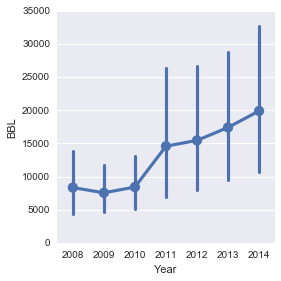

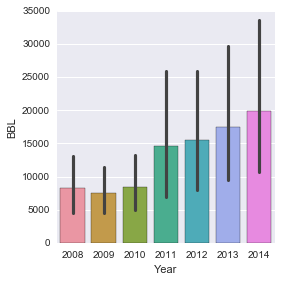

In [7]:
sb.factorplot(x = 'Year', y = 'BBL', data = brews)
sb.factorplot(x = 'Year', y = 'BBL', data = brews, kind = 'bar')

### Dividing breweries into three groups

The graph below is comparing the mean production across four groups - mega, large, medium, and micro breweries.  The four are divided by the total number of barrels (BBL) they produced in a given year.  As we can see, it is impossible to compare any sort of jumps in production because of how vast the difference in production is across the "craft brewery" market.  Some breweries produced hundreds of thousands of BBL in this time frame, while others considered it a strong year when they produced 50.  

This lends itself to larger question within the industry as to what exactly makes a 'craft brewery' different from a company such as Anheuser-Busch Inbev (also known as Budweiser).  For the sake of this study I'll be utilizing the dataset from the Brewers Association, and their defition: "Small, Independent, Traditional."  

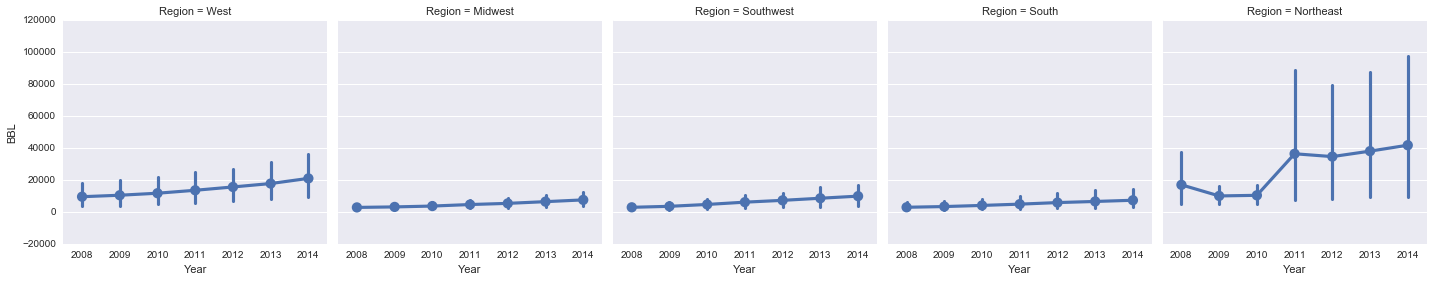

In [8]:
sb.factorplot(x = 'Year', y = 'BBL', data = brewmaster, col = 'Region')

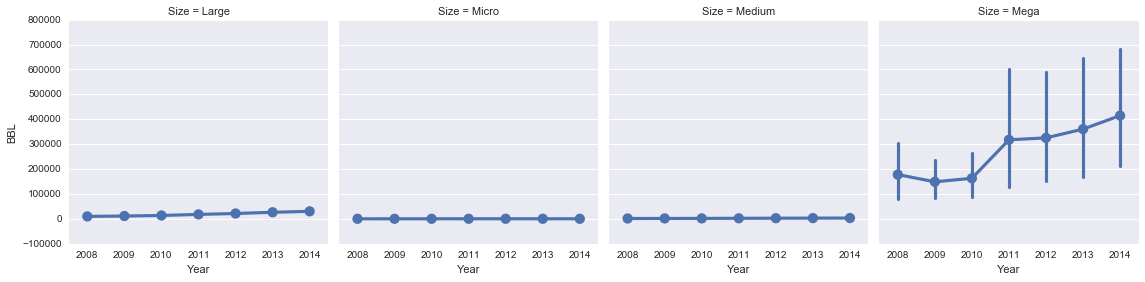

In [9]:
sb.factorplot(x = 'Year', y = 'BBL', data = brewmaster, col = 'Size')

In [10]:
micro_brews = brewmaster[brewmaster['Size'] == 'Micro']
medium_brews = brewmaster[brewmaster['Size'] == 'Medium']
large_brews = brewmaster[brewmaster['Size'] == 'Large']
mega_brews = brewmaster[brewmaster['Size'] == 'Mega']

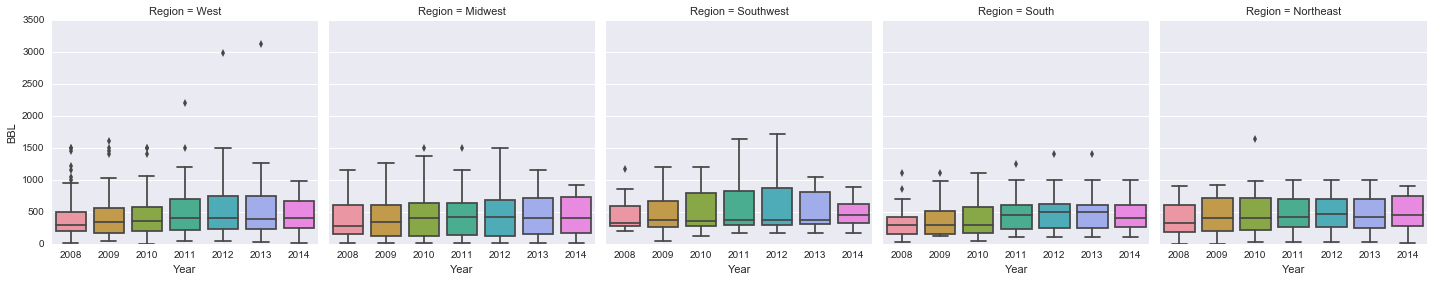

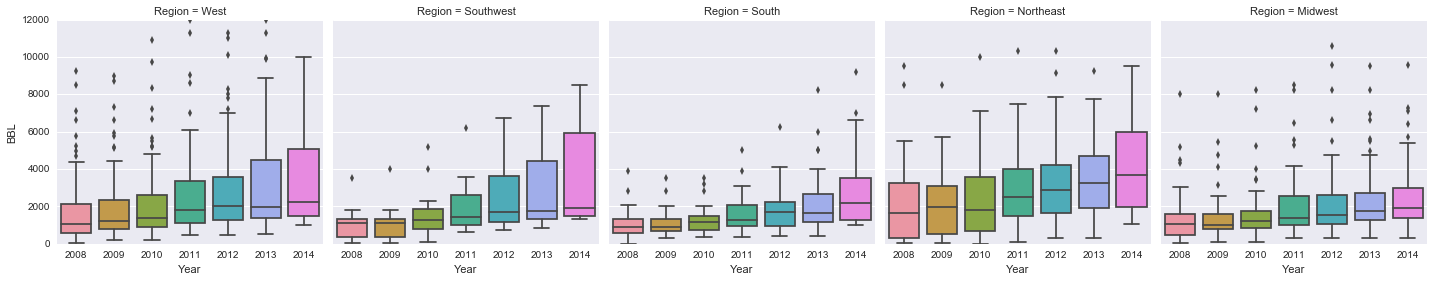

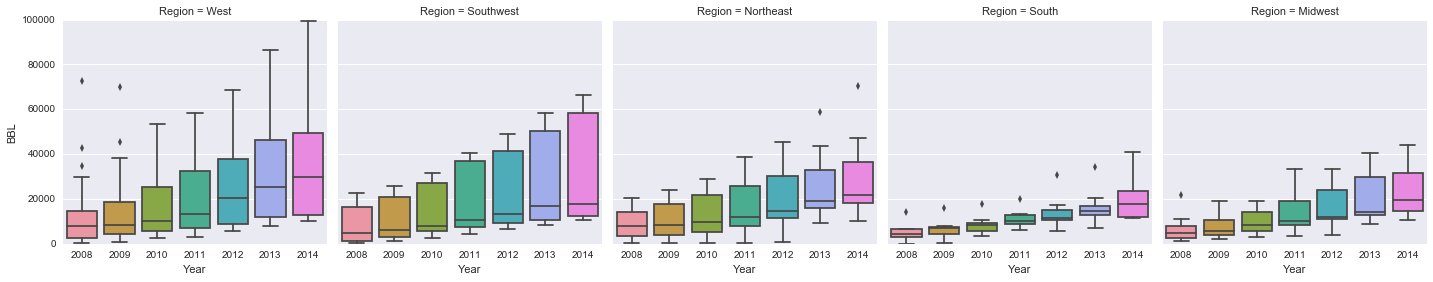

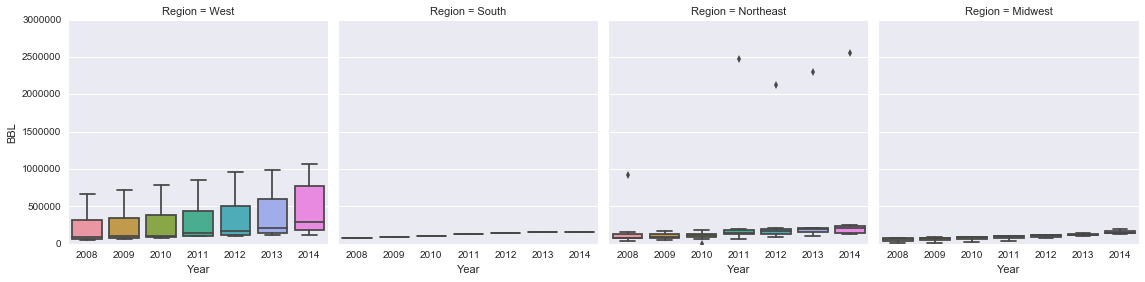

In [11]:
sb.factorplot(x = 'Year', y = 'BBL', data = micro_brews, col = 'Region', kind = 'box')
sb.factorplot(x = 'Year', y = 'BBL', data = medium_brews, col = 'Region', kind = 'box')
sb.factorplot(x = 'Year', y = 'BBL', data = large_brews, col = 'Region', kind = 'box')
sb.factorplot(x = 'Year', y = 'BBL', data = mega_brews, col = 'Region', kind = 'box')

### Comparison with income and economic indicators

In order to determine how unique this growth is to the craft beer market, I have compared it against median income per state.  This will demonstrate that craft beer was not simply growing as a result of increasing spending power.

The first set of graphs below demonstrates that there was a decrease in median income across all five regions in the U.S.  This trend began to slow down in 2011 and income slowly began to rise again in the following years.

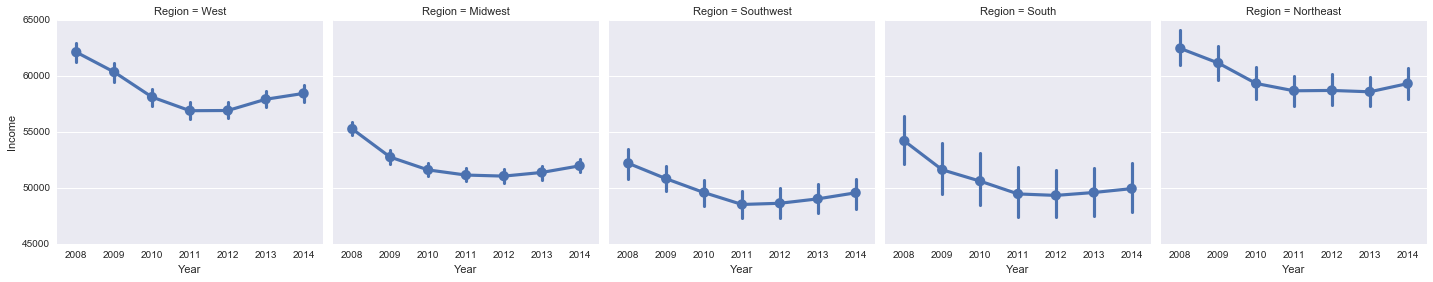

In [12]:
sb.factorplot(x = 'Year', y = 'Income', data = brewmaster, col = 'Region')

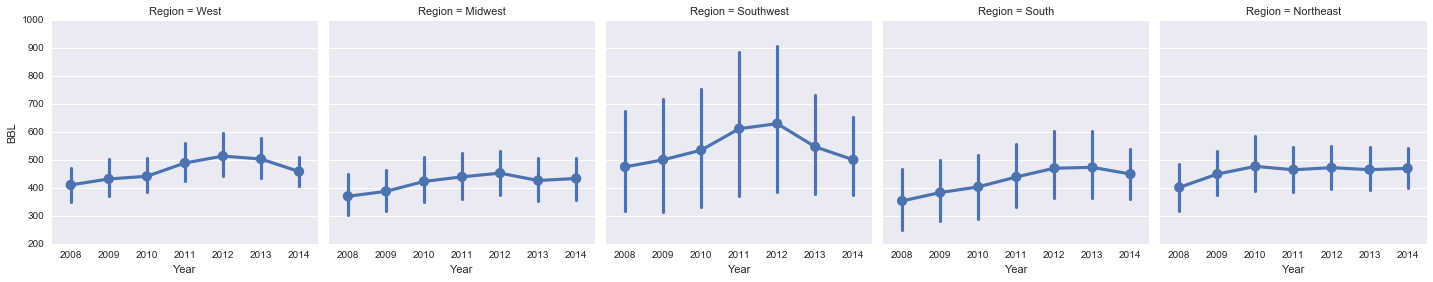

In [13]:
sb.factorplot(x = 'Year', y = 'BBL', data = micro_brews, col = 'Region')

Compared to BBL production in micro breweries, median income appears to have no major impact, and in some cases the biggest growth years for BBL are the very years where income was in the most rapid decline.  I selected micro breweries for this example because they are the most vulnerable to rapid shifts in income.

### Factor analysis

Per my problem statement - craft breweries have seen several years of growth, for both large distributors as well as local microbreweries.  And yet, there is clearly still much more room to grow within the market.  There is clearly some degree of balkanization in this growth, with regions like the Southwest showing strange fluctuations for micro-breweries.  

To help understand why this growth occured, and to eventually provide a means of targeting new markets, I will be utilizing a regression analysis to determine if there were underlying market forces that have fueled the interest in craft beer.

This will lead to the second part of the analyis - what is driving an increased interest in craft beer?

Determining consumer habits can be tricky, because there are often more factors in play than any one report can capture.  However, it is my belief that there are several large clues we may be able to determine through careful data analysis.  It is my working theory that the interest in craft beer is fueled by an increase in premiumization combined with interest from the millennial generation.


To show this, I will be conducting a regression analysis on the following against BBL:

-Sales of specialty coffee

-Sales of Wine

-Sales of organic pet food


I chose these three due to data availability, and more importantly because they represent a specific type of consumer preference, namely, more 'authentic' and 'high quality' products.  

For additional demographic analysis, I hypothesize that the single largest factor increasing the interest in craft beer is the 'millenial' generation.  While generations are often difficult to define and distinquish, millenials are largely more interested in craft beer than prior generations.  Correlations with premium products further support this as part of a larger trend towards variety and quality.

Ultimately such a trend is difficult to demonstrate in a single dataset, as individual tastes are almost impossible to measure.  However, we can find ways to compare this.  


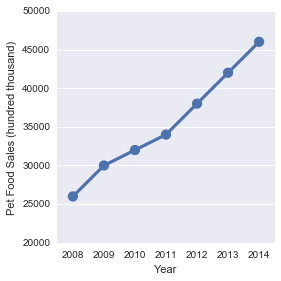

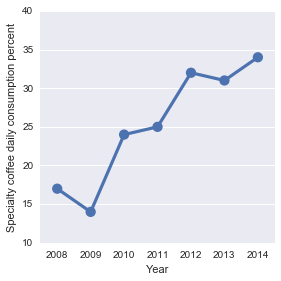

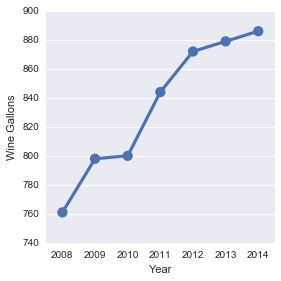

In [14]:
sb.factorplot(x = 'Year', y = 'Pet Food Sales (hundred thousand)', data = brewmaster)
sb.factorplot(x = 'Year', y = 'Specialty coffee daily consumption percent', data = brewmaster)
sb.factorplot(x = 'Year', y = 'Wine Gallons', data = brewmaster)

### Regression Testing / Hypothesis Testing

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

In [16]:
medium_brews.columns = ['Brewery','State','BBL','Year','Size','Region','Coffee_per','Pet_food','Wine','Income']
micro_brews.columns = ['Brewery','State','BBL','Year','Size','Region','Coffee_per','Pet_food','Wine','Income']
large_brews.columns = ['Brewery','State','BBL','Year','Size','Region','Coffee_per','Pet_food','Wine','Income']
brewmaster.columns = ['Brewery','State','BBL','Year','Size','Region','Coffee_per','Pet_food','Wine','Income']

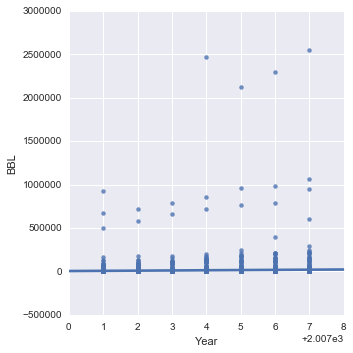

In [17]:
#sns.lmplot(x="petal_length", y="petal_width", data=iris)
#sns.plt.show()

sb.lmplot(x = 'Year', y = 'BBL' , data = brewmaster)
sb.plt.show()

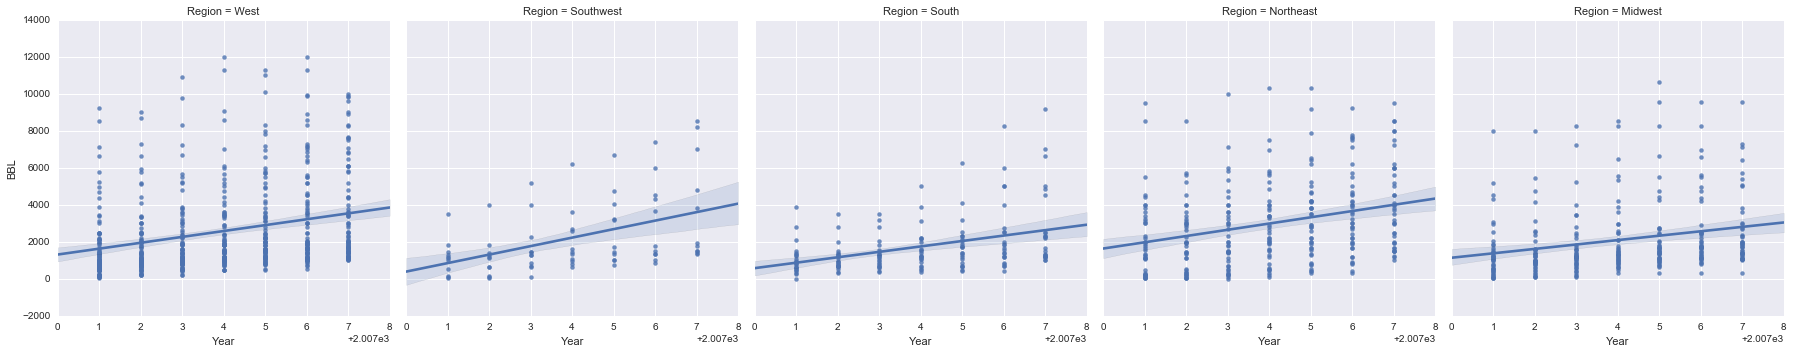

In [18]:
sb.lmplot(x = 'Year', y = 'BBL' , data = medium_brews, col = 'Region')
sb.plt.show()

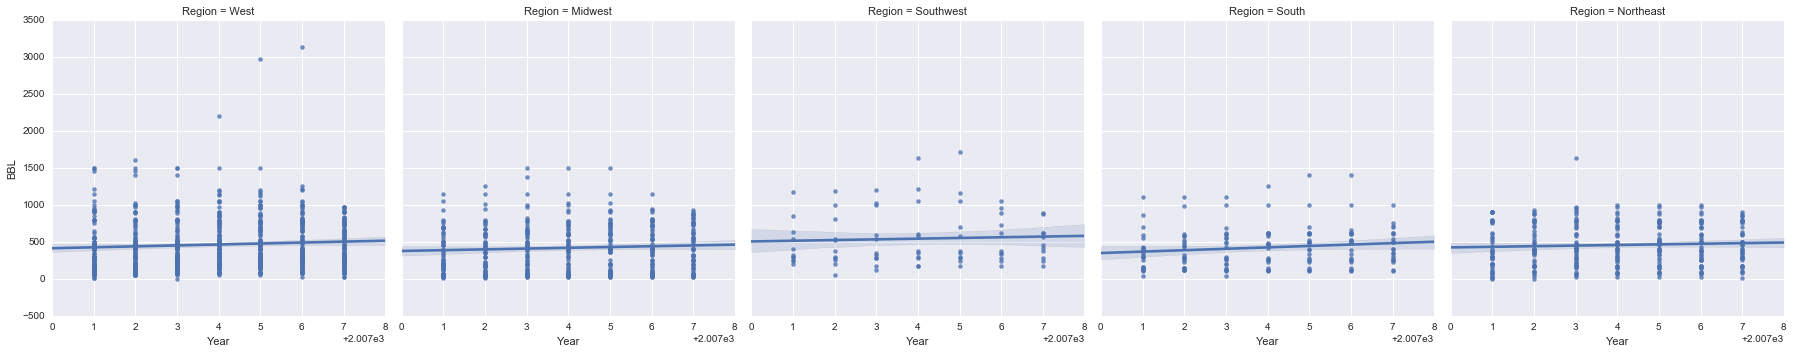

In [19]:
sb.lmplot(x = 'Year', y = 'BBL', data = micro_brews, col = 'Region')
sb.plt.show()

In [20]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
#lm = smf.ols(formula='BBL ~ Wine Gallons', data=dogbeer).fit()

#print the full summary
#lm.summary()

In [21]:
medmastertest1 = smf.ols(formula='BBL ~ Income', data=brewmaster).fit()

medmastertest1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     24.77
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           6.76e-07
Time:                        18:35:13   Log-Likelihood:                -48176.
No. Observations:                3738   AIC:                         9.636e+04
Df Residuals:                    3736   BIC:                         9.637e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4.714e+04   1.22e+04     -3.863      0.000     -7.11e+04 -2.32e+04
Income         1.0731      0.216      4.977      0.000         0.650     1.496
==============================================================================
Omnibus:                     7905.363   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26237351.401
Skew:                          18.302   Prob(JB):                         0.00
Kurtosis:                     411.801   Cond. No.                     4.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
medmastertest1 = smf.ols(formula='BBL ~ Pet_food + Wine + Coffee_per + Income', data=medium_brews).fit()

medmastertest1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     30.63
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           1.72e-24
Time:                        18:35:14   Log-Likelihood:                -12959.
No. Observations:                1428   AIC:                         2.593e+04
Df Residuals:                    1423   BIC:                         2.596e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2181.0374   2749.694     -0.793      0.428     -7574.927  3212.852
Pet_food       0.0609      0.029      2.076      0.038         0.003     0.119
Wine           2.2751      4.285      0.531      0.596        -6.131    10.681
Coffee_per    19.5661     20.035      0.977      0.329       -19.735    58.867
Income         0.0013      0.008      0.177      0.859        -0.013     0.016
==============================================================================
Omnibus:                      435.048   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1074.043
Skew:                           1.650   Prob(JB):                    5.95e-234
Kurtosis:                       5.675   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
medmastertest1 = smf.ols(formula='BBL ~ Pet_food + Wine + Coffee_per + Income', data=large_brews).fit()

medmastertest1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     24.94
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           1.21e-18
Time:                        18:35:14   Log-Likelihood:                -4962.3
No. Observations:                 448   AIC:                             9935.
Df Residuals:                     443   BIC:                             9955.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4.931e+04   3.67e+04     -1.342      0.180     -1.21e+05  2.29e+04
Pet_food       0.8812      0.390      2.261      0.024         0.115     1.647
Wine          19.2518     56.928      0.338      0.735       -92.630   131.134
Coffee_per   137.8620    265.718      0.519      0.604      -384.363   660.087
Income         0.3089      0.107      2.899      0.004         0.099     0.518
==============================================================================
Omnibus:                      124.660   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.629
Skew:                           1.468   Prob(JB):                     4.66e-59
Kurtosis:                       5.402   Cond. No.                     3.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression Analysis

These tests indicate that their could be some correlation between increased sales of organic pet food and the sale of craft beers, particularly in medium-sized and larger breweries who likely have greater name recognization and store presence.  

There is a similar possible correlation between wine sales and the growth of micro brewery production.  This suggests that consumers view wine more similarly to micro-breweries, who are more often than not based out of a single brewery and likely to house events similar to the wine industry aka tours and tastings.  

However, the analysis also indicates that the selected predictor variables have a very small impact overall.  It's very unlikely that we can put together a complete prediction model for craft beer with a small number of predictors, as consumer behavior is chaotic and difficult to quantify.

What this does allow us to do is to suggest more follow up questions - why exactly does craft beer seem to do well in areas where organic pet food is succeeding?  At a glance it would support the idea of premiumization and a desire for more authentic and wholesome products.


### Close enough for government work

A final factor I want to experiment with is the status of state laws in terms of brewing.  As indicated in several industry articles, the growth of micro-breweries has often been largely underwritten by generous tax support.

To check the validity of this within the data, I'll be assigning states a 'legal friendliness' scale.